## Modeling of Scalar Quantum Chain



The model of discrete quantum walk on a chain. Only standard Python packages are used here. QISKit is considered in [other notebooks](qubit_chain_mod.ipynb) explaining modeling of [_qubit chain_](qubit_chain.ipynb). 

In [1]:
import math
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# swap is 2x2 matrix
swap = np.array([[0, 1], [1, 0]], dtype=complex)

# Hadamard coin
c_Hadamard = (1/math.sqrt(2))*np.array([[1, 1], [1, -1]], dtype=complex)

# Balanced coin (not used)
c_bal = (1/math.sqrt(2))*np.array([[1, 1j], [1j, 1]], dtype=complex)

# step with swap and coin
s_coin = c_Hadamard.dot(swap)

In [2]:
# Number of nodes (should be odd)
n_nodes = 15

# Step 1 includes swap and coin for first partition
Step1 = np.identity(n_nodes, dtype=complex)
for i in range(0,n_nodes-1,2):
    for i1 in range(0,2):
        for i2 in range(0,2):
            Step1[i+i1,i+i2] = s_coin[i1,i2]

# Step 2 includes swap for second partition
Step2 = np.identity(n_nodes, dtype=complex)
for i in range(1,n_nodes,2):
    for i1 in range(0,2):
        for i2 in range(0,2):
            Step2[i+i1,i+i2] = swap[i1,i2]            

In [3]:
# Vector with chain nodes
ch = np.zeros(n_nodes, dtype=complex)

# Initial distribution for symmetric walk with Hadamard coin
# two central nodes
n_pos = n_nodes//2
ch[n_pos] = 1/math.sqrt(2)
ch[n_pos+1] = 1j/math.sqrt(2)

# Alternative initial distribution also could be used
#ch[0] = 1

# Probability from complex amplitude
def abs2(x):
    return x.real**2 + x.imag**2

# Vector with probabilities
ch2 = np.zeros(n_nodes, dtype = float)

[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]


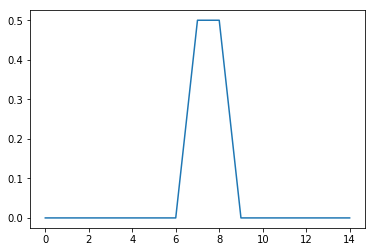

[0.   0.   0.   0.   0.   0.   0.25 0.25 0.25 0.25 0.   0.   0.   0.
 0.  ]
[0.   0.   0.   0.   0.   0.25 0.   0.25 0.25 0.   0.25 0.   0.   0.
 0.  ]


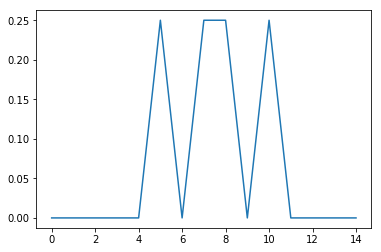

[0.    0.    0.    0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.    0.    0.   ]
[0.    0.    0.    0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.
 0.125 0.    0.   ]


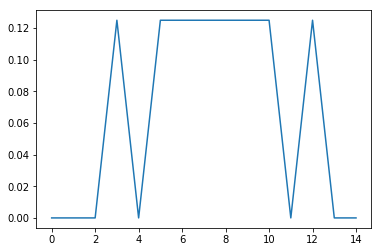

[0.     0.     0.0625 0.0625 0.0625 0.0625 0.25   0.     0.     0.25
 0.0625 0.0625 0.0625 0.0625 0.    ]
[0.     0.0625 0.     0.0625 0.0625 0.25   0.0625 0.     0.     0.0625
 0.25   0.0625 0.0625 0.     0.0625]


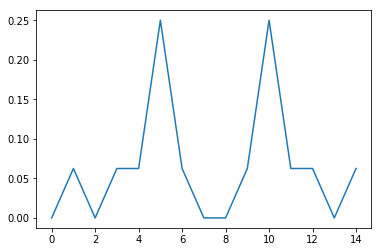

[0.03125 0.03125 0.03125 0.03125 0.28125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.28125 0.03125 0.03125 0.0625 ]
[0.03125 0.03125 0.03125 0.28125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.28125 0.0625  0.03125]


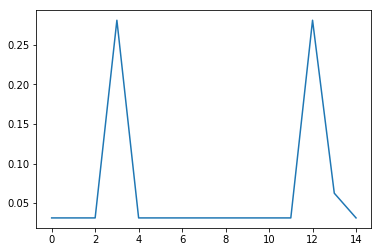

[0.03125    0.03125    0.25       0.0625     0.0625     0.
 0.         0.0625     0.0625     0.         0.         0.0625
 0.03929248 0.30445752 0.03125   ]
[0.03125    0.25       0.03125    0.0625     0.0625     0.
 0.         0.0625     0.0625     0.         0.         0.03929248
 0.0625     0.03125    0.30445752]


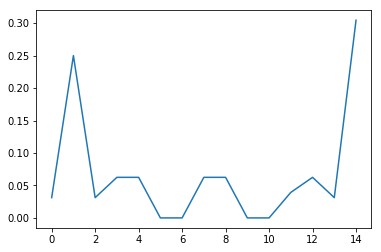

[0.203125   0.078125   0.078125   0.015625   0.03125    0.03125
 0.03125    0.03125    0.03125    0.03125    0.01964624 0.01964624
 0.00268083 0.09106917 0.30445752]


In [4]:
# Number of steps
n_step=12
for i in range(0,n_step):
    if i > 0: # step = 0 doing nothing, only draw
        if i%2 == 1 :
            ch = Step1.dot(ch) # odd steps 1 3 5 ...
        else:    
            ch = Step2.dot(ch) # even steps 2 4 6 ...
    ch2 = abs2(ch)  # calculate probabilities
    print(ch2)
    if i%2 == 0 : # plot for even steps 0 2 4 ...
        plt.plot(ch2)
        plt.show()
 